__Author:__ Soheil Esmaeilzadeh

__Email:__ soheil.esmaeilzadeh@gmail.com / soes@stanford.edu

__Date:__ 10/10/2018

# Transactions Fraud Detection
Here we do __transaction fraud detection__ using:

__1)__ Check locations of transaction - 2 different transactions in a short period. 

__2)__ User's Credit card use history 

__3)__ Classifcation on different frauds 

In [8]:
import numpy as np 
import pandas as pd 
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn import preprocessing
from subprocess import check_output

In [49]:
# import data set 
df = pd.read_csv("./input/creditcard.csv")

# check if there is any null values
print((df.isnull().sum()).sum())

df.head()

0


,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
0,0.0,-1.359807,-0.072781,2.536347,1.378155,-0.338321,0.462388,0.239599,0.098698,0.363787,...,-0.018307,0.277838,-0.110474,0.066928,0.128539,-0.189115,0.133558,-0.021053,149.62,0
1,0.0,1.191857,0.266151,0.166480,0.448154,0.060018,-0.082361,-0.078803,0.085102,-0.255425,...,-0.225775,-0.638672,0.101288,-0.339846,0.167170,0.125895,-0.008983,0.014724,2.69,0
2,1.0,-1.358354,-1.340163,1.773209,0.379780,-0.503198,1.800499,0.791461,0.247676,-1.514654,...,0.247998,0.771679,0.909412,-0.689281,-0.327642,-0.139097,-0.055353,-0.059752,378.66,0
3,1.0,-0.966272,-0.185226,1.792993,-0.863291,-0.010309,1.247203,0.237609,0.377436,-1.387024,...,-0.108300,0.005274,-0.190321,-1.175575,0.647376,-0.221929,0.062723,0.061458,123.50,0
4,2.0,-1.158233,0.877737,1.548718,0.403034,-0.407193,0.095921,0.592941,-0.270533,0.817739,...,-0.009431,0.798278,-0.137458,0.141267,-0.206010,0.502292,0.219422,0.215153,69.99,0


### Creating training dataset: Train, Dev, Test Set

In [26]:
columns = "Time V1 V2 V3 V4 V5 V6 V7 V8 V9 V10 V11 V12 V13 V14 V15 V16 V17 V18 V19 V20 V21 V22 V23 V24 V25 V26 V27 V28 Amount".split()
X = pd.DataFrame.as_matrix(df,columns=columns)
Y = np.asanyarray(df.Class)
Y = Y.reshape(Y.shape[0],1)
X.shape
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=0.06)
X_test, X_dev, Y_test, Y_dev = train_test_split(X_test,Y_test, test_size=.5)

/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:2: FutureWarning: Method .as_matrix will be removed in a future version. Use .values instead.
  


In [32]:
# Flatten the data 
X_train_flatten = X_train.reshape(X_train.shape[0],-1).T
Y_train_flatten = Y_train.reshape(Y_train.shape[0],-1).T
X_dev_flatten = X_dev.reshape(X_dev.shape[0],-1).T
Y_dev_flatten = Y_dev.reshape(Y_dev.shape[0],-1).T
X_test_flatten = X_test.reshape(X_test.shape[0],-1).T
Y_test_flatten = Y_test.reshape(Y_test.shape[0],-1).T

# Checking the shape's of the new data set as matrix 
print("No of training Examples : "+str(X_train.shape))  # 94% data 
print("No of test Examples : "+str(X_test.shape[0]))       # 3% data
print("No of dev Examples : "+str(X_dev.shape[0]))         # 3% data
print("Shape of training data : "+str(X_train.shape))
print("Shape of test data : "+str(X_test.shape))
print("Shape of dev data : "+str(X_dev.shape))
print("Shape of Y test data : "+str(Y_test.shape))
print("Shape of Y dev data : "+str(Y_dev.shape))

No of training Examples : (267718, 30)
No of test Examples : 8544
No of dev Examples : 8545
Shape of training data : (267718, 30)
Shape of test data : (8544, 30)
Shape of dev data : (8545, 30)
Shape of Y test data : (8544, 1)
Shape of Y dev data : (8545, 1)


In [34]:
# Normalize features and create final Training set 
X_train_set = preprocessing.normalize(X_train_flatten)
Y_train_set = Y_train_flatten

print("No of X_train_set shape : "+str(X_train_set.shape))  
print("No of Y_train_set shape : "+str(Y_train_set.shape)) 

No of X_train_set shape : (30, 267718)
No of Y_train_set shape : (1, 267718)


In [52]:
# Funcation to intialize weights for forward propogration 
def intialize_parameters(layer_dims):
    parameters = {}
    L = len(layer_dims)
    for l in range(1,L):
        parameters['W'+str(l)] = np.random.randn(layer_dims[l],layer_dims[l-1])*0.01
        parameters['b'+str(l)] = np.zeros((layer_dims[l],1))
            
    return parameters

# create the sigmoid function 
def sigmoid(z):
    
    s = 1/(1+np.exp(-z))
    cache = z
    return s,cache

# Relu Backward and Sigmoid Backward
def relu_backward(dA, cache):
    
    Z = cache
    dZ = np.array(dA, copy=True) # just converting dz to a correct object.
    
    # When z <= 0, you should set dz to 0 as well. 
    dZ[Z <= 0] = 0
    
    assert (dZ.shape == Z.shape)
    
    return dZ

def sigmoid_backward(dA, cache):

    Z = cache
    
    s = 1/(1+np.exp(-Z))
    dZ = dA * s * (1-s)
    
    assert (dZ.shape == Z.shape)
    
    return dZ

# create the relu function
def relu(z):
    
    r = np.maximum(0,z)
    cache = z
    return r,cache
# Relu Backward and Sigmoid Backward
def relu_backward(dA, cache):
    
    Z = cache
    dZ = np.array(dA, copy=True) # just converting dz to a correct object.
    
    # When z <= 0, you should set dz to 0 as well. 
    dZ[Z <= 0] = 0
    
    assert (dZ.shape == Z.shape)
    
    return dZ

def sigmoid_backward(dA, cache):

    Z = cache
    
    s = 1/(1+np.exp(-Z))
    dZ = dA * s * (1-s)
    
    assert (dZ.shape == Z.shape)
    
    return dZ

# Linear_forward
def linear_forward(A, W, b):

    Z = np.dot(W,A)+b
    cache = (A, W, b)
    
    return Z, cache

#linear_activation_forward
def linear_activation_forward(A_prev, W, b, activation):

    if activation == "sigmoid":
        Z, linear_cache = linear_forward(A_prev,W,b)
        A, activation_cache = sigmoid(Z)

    
    elif activation == "relu":
        Z, linear_cache = linear_forward(A_prev,W,b)
        A, activation_cache = relu(Z)
    
    cache = (linear_cache, activation_cache)

    return A, cache

# L layers forward propagation 

def forward_propagation(X, parameters):
    caches = []
    A = X
    L = len(parameters) // 2                  # number of layers in the neural network
    
    # Implement [LINEAR -> RELU]*(L-1). Add "cache" to the "caches" list.
    for l in range(1, L):
        A, cache = linear_activation_forward(A,parameters["W" + str(l)],parameters["b" + str(l)],activation="relu")
        caches.append(cache)
    
    # Implement LINEAR -> SIGMOID. Add "cache" to the "caches" list.
    AL, cache = linear_activation_forward(A,parameters["W" + str(L)],parameters["b" + str(L)],activation="sigmoid")
    caches.append(cache)
            
    return AL, caches

#  Cost function

def cost_function(AL, Y):
    m = Y.shape[1]

    cost = (-1/m)*np.sum(Y*np.log(AL)+(1-Y)*np.log(1-AL))

    cost = np.squeeze(cost)      # To make sure your cost's shape is what we expect (e.g. this turns [[17]] into 17).
    
    return cost

# linear_backward 

def linear_backward(dZ, cache):
    A_prev, W, b = cache
    m = A_prev.shape[1]

    dW = (1/m)*np.dot(dZ,A_prev.T)
    db = (1/m)*np.sum(dZ,axis=1,keepdims=True)
    dA_prev = np.dot(W.T,dZ)
    
    return dA_prev, dW, db

# linear_activation_backward

def linear_activation_backward(dA, cache, activation):

    linear_cache, activation_cache = cache
    
    if activation == "relu":
        dZ = relu_backward(dA,activation_cache)
        dA_prev, dW, db = linear_backward(dZ, linear_cache)
        
    elif activation == "sigmoid":
        dZ = sigmoid_backward(dA,activation_cache)
        dA_prev, dW, db = linear_backward(dZ, linear_cache)
    
    return dA_prev, dW, db

# backward propagation

def backward_propagation(AL, Y, caches):
    
    grads = {}
    L = len(caches) # the number of layers
    Y = Y.reshape(AL.shape) # after this line, Y is the same shape as AL
    
    # Initializing the backpropagation
    dAL = - (np.divide(Y, AL) - np.divide(1 - Y, 1 - AL))
    
    # Lth layer (SIGMOID -> LINEAR) gradients. Inputs: "AL, Y, caches". Outputs: "grads["dAL"], grads["dWL"], grads["dbL"]
    current_cache = caches[L-1]
    grads["dA" + str(L)], grads["dW" + str(L)], grads["db" + str(L)] = linear_activation_backward(dAL,current_cache,activation="sigmoid")
    
    for l in reversed(range(L-1)):
        # lth layer: (RELU -> LINEAR) gradients.
        # Inputs: "grads["dA" + str(l + 2)], caches". Outputs: "grads["dA" + str(l + 1)] , grads["dW" + str(l + 1)] , grads["db" + str(l + 1)] 
        current_cache = caches[l]
        dA_prev_temp, dW_temp, db_temp = linear_activation_backward(grads["dA"+str(l+2)],current_cache,activation="relu")
        grads["dA" + str(l + 1)] = dA_prev_temp
        grads["dW" + str(l + 1)] = dW_temp
        grads["db" + str(l + 1)] = db_temp

    return grads

# update parameters 

def update_parameters(parameters, grads, learning_rate):

    L = len(parameters) // 2 # number of layers in the neural network
    for l in range(1,L+1):
        parameters["W"+str(l)]=parameters["W" + str(l)]-learning_rate*grads["dW" + str(l)]
        parameters["b"+str(l)]=parameters["b" + str(l)]-learning_rate*grads["db" + str(l)]
    return parameters

# predict Function
def predict(X, y, parameters):
    
    m = X.shape[1]
    p = np.zeros((1,m))
    
    # Forward propagation
    probas, caches = forward_propagation(X, parameters)

    
    # convert probas to 0/1 predictions
    for i in range(0, probas.shape[1]):
        if probas[0,i] > 0.5:
            p[0,i] = 1
        else:
            p[0,i] = 0
    
    #print results
    #print ("predictions: " + str(p))
    #print ("true labels: " + str(y))
    print("Accuracy: "  + str(np.sum((p == y)/m)), '\n')
        
    return p


In [43]:
# setting the size of the network 
layer_dims = [30,20,10,5,1] #5 Layer model with 3 hidden layers 

# Deep Learning network to classify frauds and normal
layer_dims = [30,20,10,5,1] #5 Layer model with 3 hidden layers 

# Deep Learning network to classify frauds and normal
def nn_model(X,Y,layer_dims,learning_rate=.0065, num_iterations=2500,print_cost=False):
    costs = []
    
    #initialize parameters 
    parameters = intialize_parameters(layer_dims)
    # for loop for iterations/epoch 
    for i in range(0,num_iterations):
        #forward_propagation
        AL, caches = forward_propagation(X, parameters)
        
        #compute cost
        cost = cost_function(AL, Y)
        
        #backward_propagation 
        grads = backward_propagation(AL, Y, caches)
        
        #update parameters
        parameters = update_parameters(parameters,grads,learning_rate)
        
        if print_cost and i % 100 == 0:
            print ("Cost after iteration %i: %f" %(i, cost))
        if print_cost and i % 100 == 0:
            costs.append(cost)
        
    # plot the cost
    plt.plot(np.squeeze(costs))
    plt.ylabel('cost')
    plt.xlabel('iterations (per tens)')
    plt.title("Learning rate =" + str(learning_rate))
    plt.show()
    
    return parameters

Cost after iteration 0: 0.693147
Cost after iteration 100: 0.555154
Cost after iteration 200: 0.454717
Cost after iteration 300: 0.380435
Cost after iteration 400: 0.324373
Cost after iteration 500: 0.281164
Cost after iteration 600: 0.247183
Cost after iteration 700: 0.219958
Cost after iteration 800: 0.197780
Cost after iteration 900: 0.179441
Cost after iteration 1000: 0.164074
Cost after iteration 1100: 0.151043
Cost after iteration 1200: 0.139878
Cost after iteration 1300: 0.130219
Cost after iteration 1400: 0.121794
Cost after iteration 1500: 0.114388
Cost after iteration 1600: 0.107834
Cost after iteration 1700: 0.101997
Cost after iteration 1800: 0.096770
Cost after iteration 1900: 0.092064
Cost after iteration 2000: 0.087807
Cost after iteration 2100: 0.083940
Cost after iteration 2200: 0.080413
Cost after iteration 2300: 0.077185
Cost after iteration 2400: 0.074219


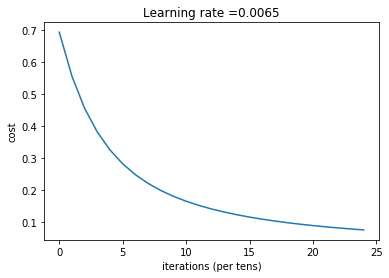

In [45]:
# running the model and training
parameters = nn_model(X_train_set,Y_train_set,layer_dims,learning_rate=.0065,num_iterations = 2500, print_cost = True)

In [53]:
print('train set accuracy is: ')

pred_train = predict(X_train_set, Y_train_set, parameters)

print('dev set accuracy is: ')
pred_dev = predict(X_dev_flatten, Y_dev_flatten, parameters)

print('test set accuracy is: ')
pred_test = predict(X_test_flatten, Y_test_flatten, parameters)


train set accuracy is: 
Accuracy: 0.9983116562950571 

dev set accuracy is: 
Accuracy: 0.9980105324751315 

test set accuracy is: 
Accuracy: 0.9973080524344572 

